# Correspondence Analysis of Attitudes to Women in Work EU survey

Here is is interesting to see the differences of opinion between each gender-marital status combination. The bi-plot successfully reduces dimensionality to just one plot!

ERROR: Error in windows(height = 5, width = 10): could not find function "windows"


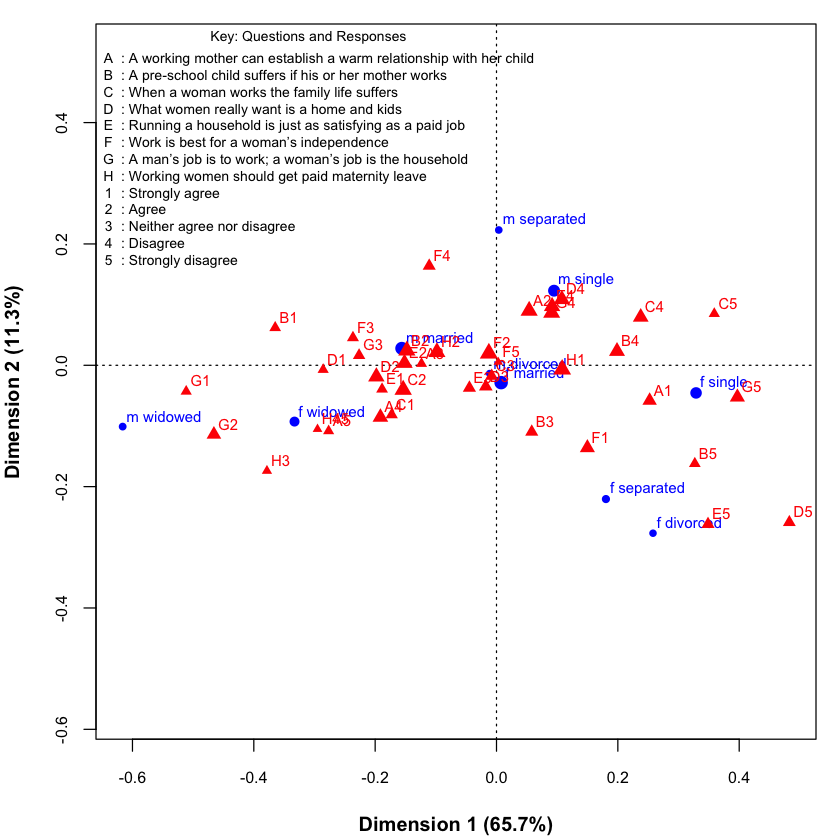

# Alternative visualisations

I also wanted to experiment with an alternative way of visualising the Attitudes to Women survey data (below.) My thoughts on the relative advantages and disadvantages of this approach are listed below.

1) Disadvantages
- The way that the dimensionality has been reduced in this analysis is by manually selecting which questions in the survey to group. In higher dimensions, or in other settings, this may not be appropriate. Additionally, we pass on our own prior beliefs as to how the questions should be grouped, and potentially miss out on new patterns available in the data. 
- Smaller differences between distributions may not be so obvious here. 

2) Advantages
- This visualisation is more intuitively interpretable i.e. there is no abstract dimension plotted, which can make the interpretation difficult, especially for lay readers or those inexperienced with bi-plots.
- This plot shows at a glance the distribution of responses, including cases where responses are polarised or heavily weighted towards one end of the spectrum.


N.B. For my own interest, Further down in the notebook, I additionally plotted the distribution of reponses for every question individually. I didn't include the results upfront because the dimensionality has not been sufficiently reduced! 

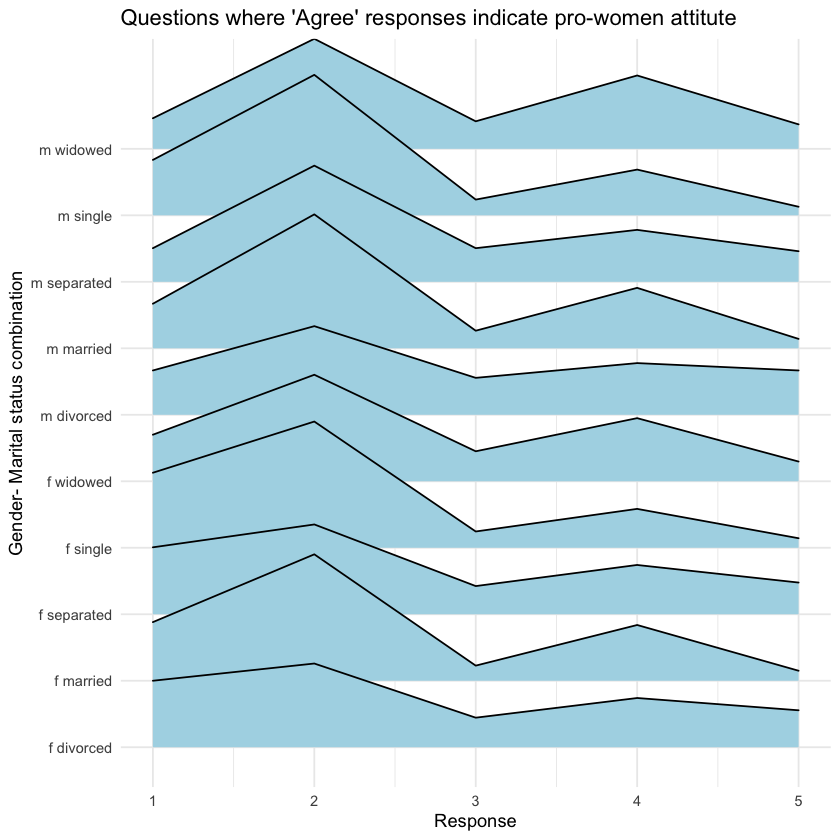

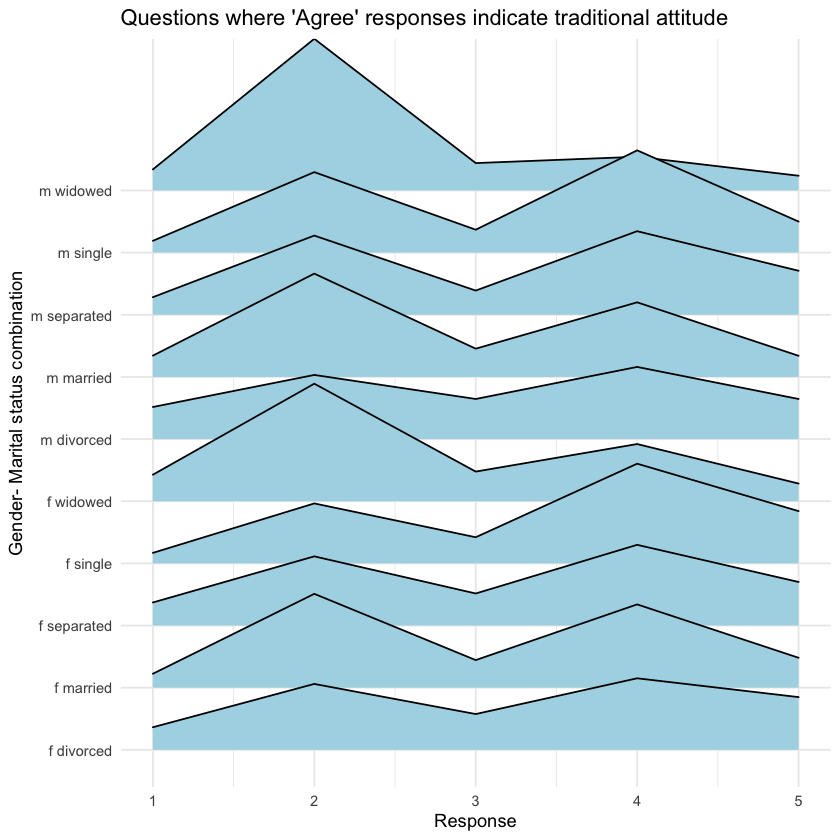

#  CODE

# Install packages

In [1]:
# Import packages

require(ca)

Loading required package: ca


# Read data

In [25]:
# Read data

setwd('/Users/chloemaine/Documents/Chloe/BGSE/data_vis_t2')

WOMEN = read.csv("WOMEN.csv", header = TRUE)

In [17]:
# View data

head(WOMEN)

dim(WOMEN)

X,A,B,C,D,E,F,G,H,g,m,e,a
1,2,4,3,3,4,1,4,1,1,1,3,4
2,2,4,3,9,4,1,4,1,1,1,3,3
3,3,2,2,3,4,1,3,2,2,2,1,6
4,3,9,2,2,2,1,3,1,1,1,1,6
5,9,1,2,2,3,2,3,1,2,1,1,4
6,2,4,4,4,2,2,5,1,1,5,4,2


[1] 2471   13

# Data set “women”
ISSP 2002 survey on Family and Changing Gender Roles III. Spanish sample (N=2471), but respondents with some missing values taken out, leaving N=2107.

A: a working mother can establish a warm relationship with her child 

B: a pre-school child suffers if his or her mother works

C: when a woman works the family life suffers

D: what women really want is a home and kids

E: running a household is just as satisfying as a paid job 

F: work is best for a woman’s independence

G: a man’s job is to work; a woman’s job is the household 

H: working women should get paid maternity leave


Demographics:

g: gender (1=male, 2=female)

m: marital status (1=married/living as married, 2=widowed, 3=divorced, 4=separated, but married, 5=single, never married)

e: education (0=no formal education, 1=lowest education, 2= above lowest education, 3=higher secondary completed, 4=above higher secondary level, below full university, 5=university degree completed

a: age (1=16-25 years, 2= 26-35, 3=36-45, 4=46-55, 5=56-65, 6=66 and older)

# Remove missing data

In [2]:
### remove missing data into new object 'women' (lowercase)

remove <- which(apply(WOMEN==9,1,sum)>0)
women  <- WOMEN[-remove,]
# dim(women)

### All one-way tables (lots of printout...)
### Note that variable H's category 5 already combined with category 4

apply(women, 2, table)

In [255]:
### Get all the tables from the BUrt matrix which results from MCA
### using function mjca()
### Then analyse the concatenated tables using ca()

### Create ga, the interaction of gender and marital status categories

women$gm <- 6*(women$g-1) + women$m
raw_women <- women

# head(women)


### Burt matrix of all 10 variables: order A to H, then ga then m and e 

require(ca)
women.Burt <- mjca(women[,c(1:9, 14)], ps="")$Burt  # Can add in 12 and 13 for age and education

women.Burt = women.Burt[2107:2155,2107:2155]

dim(women.Burt)
colnames(women.Burt)

### redefine some category names

colnames(women.Burt)[39] <- rownames(women.Burt)[39] <-  c("H45") 

### concatenated tables

women.concat <- women.Burt[40:49, 1:39]
rownames(women.concat) <- c("m married", "m widowed", "m divorced", "m separated", "m single", "f married",
                           "f widowed", "f divorced", "f separated", "f single")

women.concat

[1] 49 49

[1] "A1"   "A2"   "A3"   "A4"   "A5"   "B1"   "B2"   "B3"   "B4"   "B5"  
[11] "C1"   "C2"   "C3"   "C4"   "C5"   "D1"   "D2"   "D3"   "D4"   "D5"  
[21] "E1"   "E2"   "E3"   "E4"   "E5"   "F1"   "F2"   "F3"   "F4"   "F5"  
[31] "G1"   "G2"   "G3"   "G4"   "G5"   "H1"   "H2"   "H3"   "H4"   "gm1" 
[41] "gm2"  "gm3"  "gm4"  "gm5"  "gm7"  "gm8"  "gm9"  "gm10" "gm11"

,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,F5,G1,G2,G3,G4,G5,H1,H2,H3,H45
m married,82,228,29,177,26,52,270,56,140,24,...,7,36,137,59,219,91,261,249,18,14
m widowed,4,12,0,14,1,3,24,1,3,0,...,0,2,21,4,4,0,9,18,3,1
m divorced,2,8,2,5,4,4,9,4,4,0,...,0,0,3,1,11,6,12,8,1,0
m separated,1,16,3,5,1,2,13,2,8,1,...,0,0,4,1,13,8,12,14,0,0
m single,76,188,9,70,9,15,158,33,131,15,...,5,11,52,26,169,94,183,160,6,3
f married,110,257,25,204,30,28,280,82,193,43,...,7,22,118,55,281,150,348,259,12,7
f widowed,17,56,9,49,10,10,77,15,34,5,...,2,17,57,15,39,13,57,76,5,3
f divorced,8,9,0,7,0,1,7,6,8,2,...,1,0,4,1,8,11,9,14,0,1
f separated,11,16,2,11,3,2,17,5,16,3,...,0,0,10,2,15,16,26,14,3,0
f single,86,141,12,56,5,7,101,33,127,32,...,3,6,19,16,129,130,187,105,4,4


# Correspondence analysis and plot

In [ ]:
### do the correspondence analysis and plot
options(warn=-1)

require(ca)
women.ca <- ca(women.concat)

par(mfrow = c(1,1), mar=c(4.2,4,1,1), font.lab=2, cex.axis=0.8)
plot(women.ca, mass=c(T,T))

leg.txt <- c(": A working mother can establish a warm relationship with her child",
             ": A pre-school child suffers if his or her mother works",
             ": When a woman works the family life suffers",
             ": What women really want is a home and kids",
             ": Running a household is just as satisfying as a paid job",
             ": Work is best for a woman’s independence",
             ": A man’s job is to work; a woman’s job is the household",
             ": Working women should get paid maternity leave",
             ": Strongly agree",
             ": Agree",
             ": Neither agree nor disagree",
             ": Disagree",
             ": Strongly disagree")

legend(x= "topleft", title = "Key: Questions and Responses", legend=leg.txt, pch= "ABCDEFGH12345", cex=0.7, bty= "n")


windows(height = 5, width = 10)
par()

# GG ridges: An alternative visualisation 

In [141]:
# Install packages

install.packages("ggplot2")
install.packages("ggridges")
library(ggplot2)
library(ggridges)
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [620]:
women <- raw_women

# Create summary dataframe
library(dplyr)

# Count responses for each question by gm group
A = women %>% group_by(gm) %>% dplyr::count(A)
colnames(A) <- c("idx1", "idx2", "A")
B = women %>% group_by(gm) %>% dplyr::count(B)
colnames(B) <- c("idx1", "idx2", "B")
C = women %>% group_by(gm) %>% dplyr::count(C)
colnames(C) <- c("idx1", "idx2", "C")
D = women %>% group_by(gm) %>% dplyr::count(D)
colnames(D) <- c("idx1", "idx2", "D")
E = women %>% group_by(gm) %>% dplyr::count(E)
colnames(E) <- c("idx1", "idx2", "E")
F = women %>% group_by(gm) %>% dplyr::count(F)
colnames(F) <- c("idx1", "idx2", "F")
G = women %>% group_by(gm) %>% dplyr::count(G)
colnames(G) <- c("idx1", "idx2", "G")
H = women %>% group_by(gm) %>% dplyr::count(H)
colnames(H) <- c("idx1", "idx2", "H")

# Join dfs to make a super dataframe: new_women
library(plyr)
AB <- join(A, B, by= c("idx1", "idx2"), type= "full")
CD <- join(C, D, by= c("idx1", "idx2"), type= "full")
EF <- join(E, F, by= c("idx1", "idx2"), type= "full")
GH <- join(G, H, by= c("idx1", "idx2"), type= "full")
ABCD <- join(AB, CD, by= c("idx1", "idx2"), type= "full")
EFGH <- join(EF, GH, by= c("idx1", "idx2"), type= "full")
new_women <- join(ABCD, EFGH, by= c("idx1", "idx2"), type= "full")

# Rename column names to make more intelligible!
colnames(new_women)[1:2] <- c("gm", "resp")

# View the final product
head(new_women)
print(dim(new_women))

# Prepare for plotting!

A_women <- new_women[c(1:3)]
A_women <- A_women[order(A_women[,1], new_women[,2]), ]

B_women <- new_women[c(1:2,4)]
B_women <- B_women[order(B_women[,1], new_women[,2]), ]

C_women <- new_women[c(1:2,5)]
C_women <- C_women[order(C_women[,1], new_women[,2]), ]

D_women <- new_women[c(1:2,6)]
D_women <- D_women[order(D_women[,1], new_women[,2]), ]

E_women <- new_women[c(1:2,7)]
E_women <- E_women[order(E_women[,1], new_women[,2]), ]

F_women <- new_women[c(1:2,8)]
F_women <- F_women[order(F_women[,1], new_women[,2]), ]

G_women <- new_women[c(1:2,9)]
G_women <- G_women[order(G_women[,1], new_women[,2]), ]

H_women <- new_women[c(1:2,10)]
H_women <- H_women[order(H_women[,1], new_women[,2]), ]

# Rescale

rescaled_A = rescale(A_women, A)
rescaled_B = rescale(B_women, B)
rescaled_C = rescale(C_women, C)
rescaled_D = rescale(D_women, D)
rescaled_E = rescale(E_women, E)
rescaled_F = rescale(F_women, F)
rescaled_G = rescale(G_women, G)
rescaled_H = rescale(H_women, H)

# Transpose

library(data.table)

rescaled_A <- transpose(data.frame(rescaled_A))
rescaled_B <- transpose(data.frame(rescaled_B))
rescaled_C <- transpose(data.frame(rescaled_C))
rescaled_D <- transpose(data.frame(rescaled_D))
rescaled_E <- transpose(data.frame(rescaled_E))
rescaled_F <- transpose(data.frame(rescaled_F))
rescaled_G <- transpose(data.frame(rescaled_G))
rescaled_H <- transpose(data.frame(rescaled_H))

ys = c( rep("m married", 5),
        rep("m widowed", 5),
        rep("m divorced" ,5),
        rep("m separated" ,5),
        rep("m single",5),
        rep("f married",5),
        rep("f widowed",5),
        rep("f divorced",5),
        rep("f separated",5),
        rep("f single",5))

gm,resp,A,B,C,D,E,F,G,H
1,1,82,52,51,28,43,101,36,261
1,2,228,270,274,224,207,325,137,249
1,3,29,56,68,75,74,40,59,18
1,4,177,140,130,183,186,69,219,14
1,5,26,24,19,32,32,7,91,NA
2,1,4,3,2,2,2,3,2,9


[1] 50 10


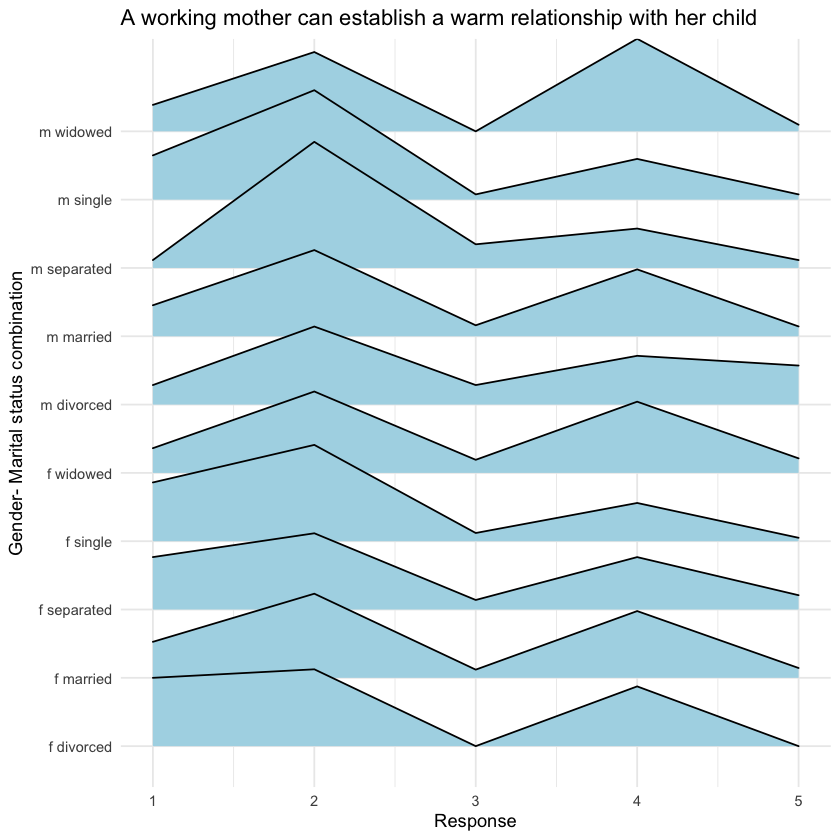

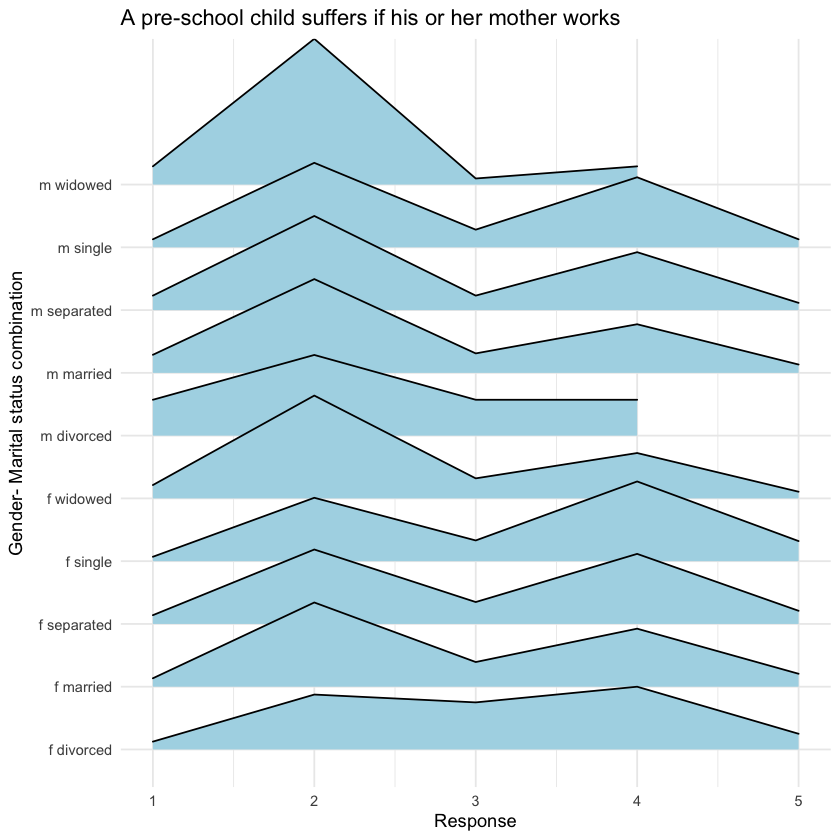

In [659]:
d <- data.frame(
  x = rep(1:5, 10),
  y = ys,
  height = rescaled_A
)

ggplot(d, aes(x, y, height = V1, group = y)) + 
geom_ridgeline(scale=1, fill= "light blue") +
ylab("Gender- Marital status combination") +
xlab("Response") + 
theme_minimal() + 
ggtitle("A working mother can establish a warm relationship with her child")

d <- data.frame(
  x = rep(1:5, 10),
  y = ys,
  height = rescaled_B
)


ggplot(d, aes(x, y, height = V1, group = y)) + 
geom_ridgeline(scale=1, fill= "light blue") +
ylab("Gender- Marital status combination") +
xlab("Response") + 
theme_minimal() + 
ggtitle("A pre-school child suffers if his or her mother works")

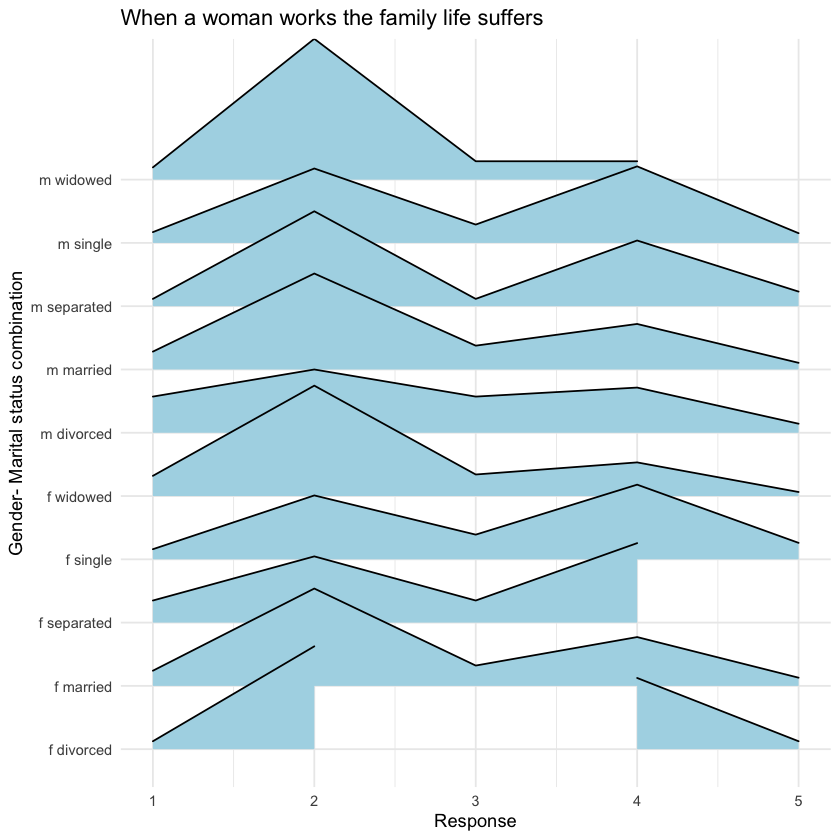

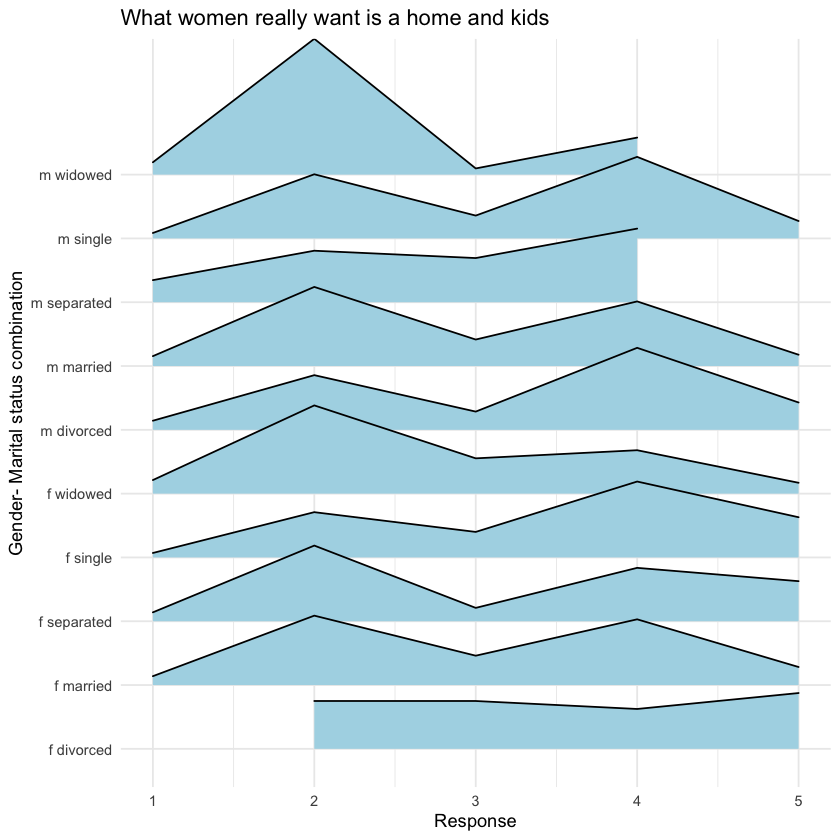

In [657]:
d <- data.frame(
  x = rep(1:5, 10),
  y = ys,
  height = rescaled_C
)


ggplot(d, aes(x, y, height = V1, group = y)) + 
geom_ridgeline(scale=1, fill= "light blue") +
ylab("Gender- Marital status combination") +
xlab("Response") + 
theme_minimal() + 
ggtitle("When a woman works the family life suffers")

d <- data.frame(
  x = rep(1:5, 10),
  y = ys,
  height = rescaled_D
)


ggplot(d, aes(x, y, height = V1, group = y)) + 
geom_ridgeline(scale=1, fill= "light blue") +
ylab("Gender- Marital status combination") +
xlab("Response") + 
theme_minimal() + 
ggtitle("What women really want is a home and kids")


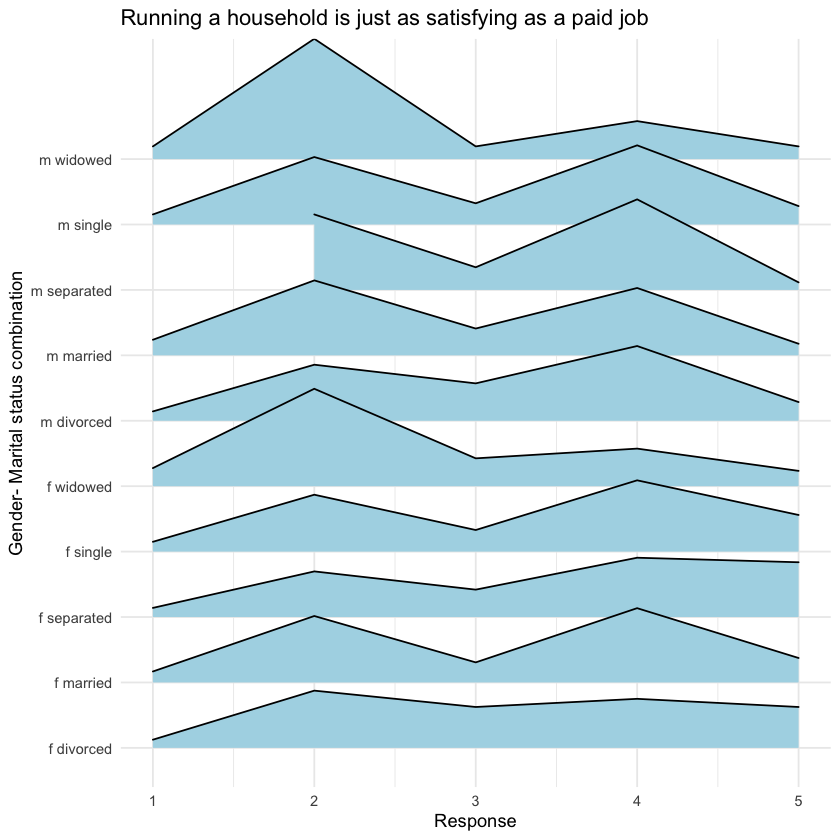

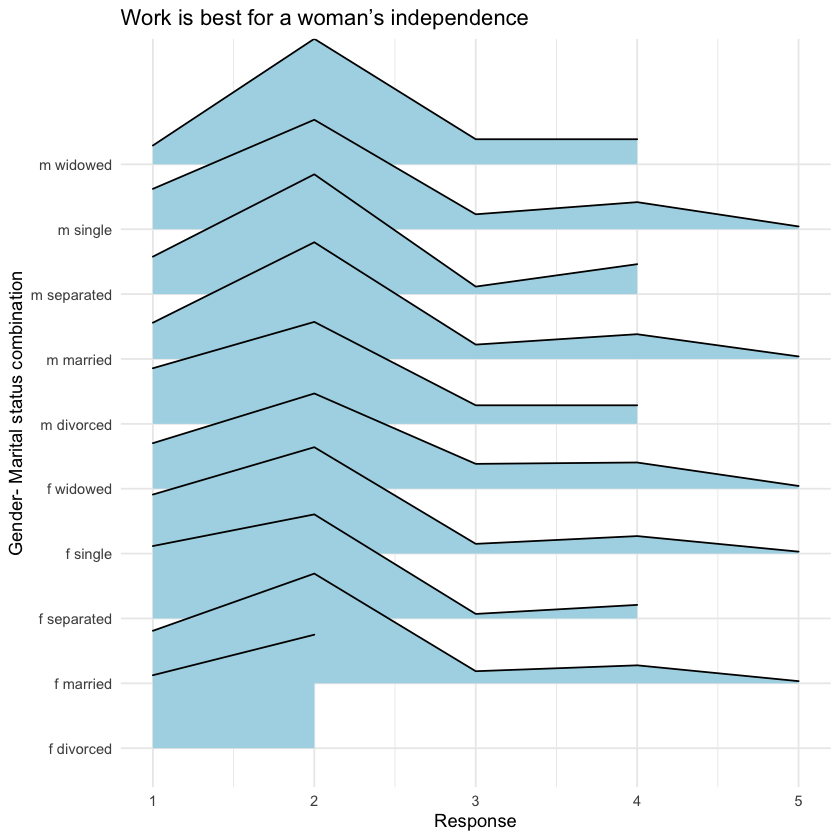

In [660]:
d <- data.frame(
  x = rep(1:5, 10),
  y = ys,
  height = rescaled_E
)


ggplot(d, aes(x, y, height = V1, group = y)) + 
geom_ridgeline(scale=1, fill= "light blue") +
ylab("Gender- Marital status combination") +
xlab("Response") + 
theme_minimal() + 
ggtitle("Running a household is just as satisfying as a paid job")

d <- data.frame(
  x = rep(1:5, 10),
  y = ys,
  height = rescaled_F
)


ggplot(d, aes(x, y, height = V1, group = y)) + 
geom_ridgeline(scale=1, fill= "light blue") +
ylab("Gender- Marital status combination") +
xlab("Response") + 
theme_minimal() + 
ggtitle("Work is best for a woman’s independence")

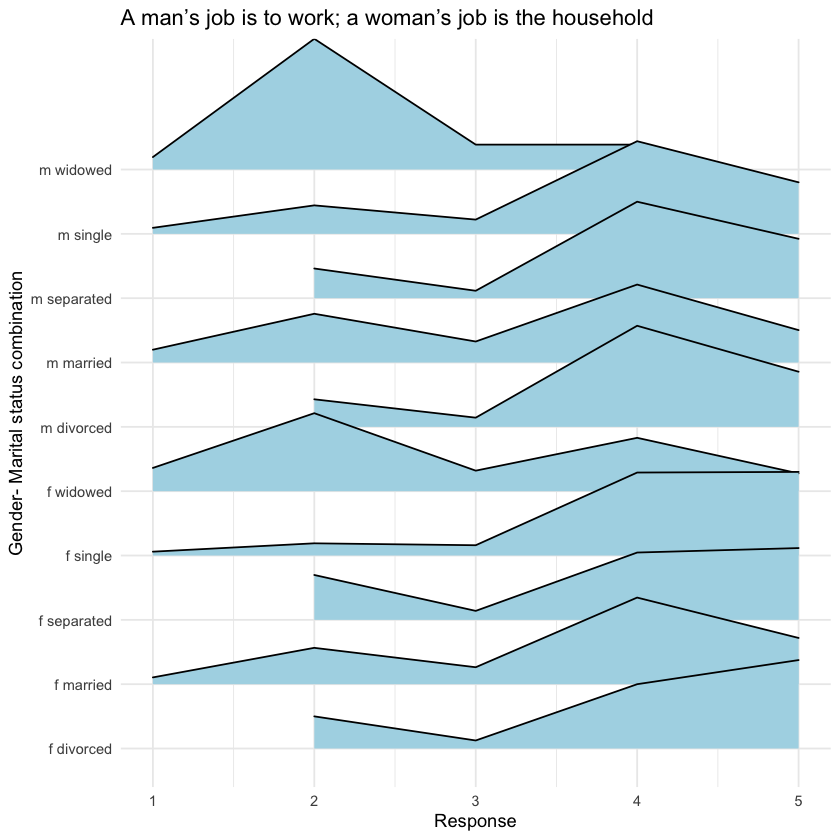

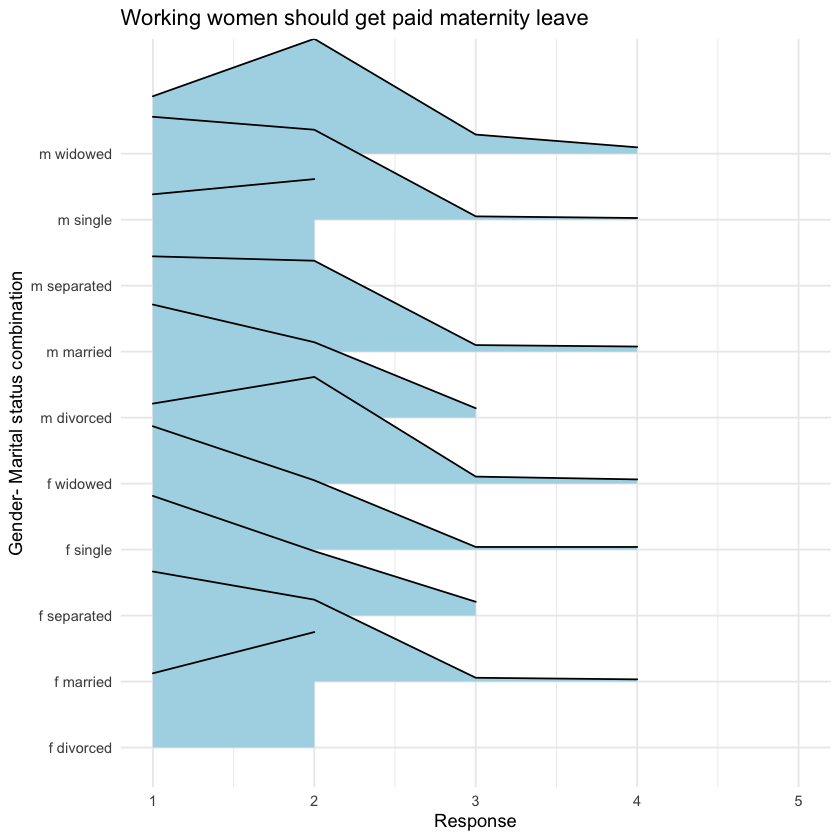

In [661]:
d <- data.frame(
  x = rep(1:5, 10),
  y = ys,
  height = rescaled_G
)


ggplot(d, aes(x, y, height = V1, group = y)) + 
geom_ridgeline(scale=1, fill= "light blue") +
ylab("Gender- Marital status combination") +
xlab("Response") + 
theme_minimal() + 
ggtitle("A man’s job is to work; a woman’s job is the household")

d <- data.frame(
  x = rep(1:5, 10),
  y = ys,
  height = rescaled_H
)

ggplot(d, aes(x, y, height = V1, group = y)) + 
geom_ridgeline(scale=1, fill= "light blue") +
ylab("Gender- Marital status combination") +
xlab("Response") + 
theme_minimal() + 
ggtitle("Working women should get paid maternity leave")

In [ ]:
# Overall summary

pro_women <- new_women[,c(1,2,3,8)]
sexist <- new_women[,c(1,2,4,5,9)]

pro_women['all_qs'] <- rowSums(pro_women, na.rm= TRUE)
sexist['all_qs'] <- rowSums(sexist, na.rm= TRUE)

pro_women <- pro_women[,c(1,2,5)]
sexist <- sexist[,c(1,2,6)]

pro_women <- pro_women[order(pro_women[,1], pro_women[,2]), ]
sexist <- sexist[order(sexist[,1], sexist[,2]),]

pro_women = rescale(pro_women, all_qs)
sexist = rescale(sexist, all_qs)

library(data.table)

pro_women <- transpose(data.frame(pro_women))
sexist <- transpose(data.frame(sexist))

d <- data.frame(
  x = rep(1:5, 10),
  y = ys,
  height = pro_women
)

ggplot(d, aes(x, y, height = V1, group = y)) + 
geom_ridgeline(scale=1, fill= "light blue") +
ylab("Gender- Marital status combination") +
xlab("Response") + 
theme_minimal() + 
ggtitle("Questions where 'Agree' responses indicate pro-women attitute")

d <- data.frame(
  x = rep(1:5, 10),
  y = ys,
  height = sexist
)


ggplot(d, aes(x, y, height = V1, group = y)) + 
geom_ridgeline(scale=1, fill= "light blue") +
ylab("Gender- Marital status combination") +
xlab("Response") + 
theme_minimal() + 
ggtitle("Questions where 'Agree' responses indicate traditional attitude "

#  Functions

In [675]:
rescale <- function(df, letter) {
    
    new_vector <- list()

    for (i in 1:50) {
        for (j in 1:11) {
            if (j == df[i,1]) {
                if (j > 5) { j <- j-1 }
                scale_sum = sum(df[((j*5)-4):(j*5),3], na.rm= TRUE) / 4
                new_vector <- c(new_vector, (df[i,3] /scale_sum))}
            }
        } 
    
return(new_vector)
}